In [303]:
%load_ext autoreload
%load_ext blackcellmagic
%autoreload 2

import os as os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

import parmed as pmd
import pytraj as pt

from smirnovert.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [294]:
mpl.rc("text", usetex=True)
mpl.rcParams["text.latex.preamble"] = [
    r"\usepackage{amsmath}",
    r"\usepackage{helvet}",
    r"\usepackage{sansmath}",
    r"\sansmath",
    r"\renewcommand{\familydefault}{\sfdefault}",
    r"\usepackage[T1]{fontenc}",
    r"\usepackage{graphicx}",
    r"\usepackage{upgreek}",
]

sns.set_style("whitegrid", rc={"legend.frameon": False})
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 20})
sns.set_style("ticks", {"xtick.minor.size": 10, "ytick.minor.size": 10})
sns.set_context(
    "paper", font_scale=1.4, rc={"lines.linewidth": 5, "legend.frameon": False}
)


In [253]:
original = pmd.load_file(
    "systems/a-bam-p/confirm-original/a000/full.hmr.topo",
    "systems/a-bam-p/confirm-original/a000/full.crds",
    structure=True,
)

smirnoff = pmd.load_file(
    "systems/a-bam-p/smirnoff/a000/smirnoff.prmtop",
    "systems/a-bam-p/smirnoff/a000/smirnoff.inpcrd",
    structure=True,
)

In [256]:
original.strip(':WAT, :Na+, :Cl-, :BAM, :DUM')
original.save('compare-parameters/MGO-original.prmtop')
original.save('compare-parameters/MGO-original.inpcrd')

In [257]:
smirnoff.strip(':WAT, :Na+, :Cl-, :BAM, :DUM')
smirnoff.save('compare-parameters/MGO-smirnoff.prmtop')
smirnoff.save('compare-parameters/MGO-smirnoff.inpcrd')

In [258]:
original = pmd.load_file(
    "compare-parameters/MGO-original.prmtop",
    "compare-parameters/MGO-original.inpcrd",
    structure=True,
)

smirnoff = pmd.load_file(
    "compare-parameters/MGO-smirnoff.prmtop",
    "compare-parameters/MGO-smirnoff.inpcrd",
    structure=True,
)

In [262]:
for atom in smirnoff.atoms:
    print(atom, atom.type)

<Atom C1 [0]; In MGO 0> 1
<Atom H1 [1]; In MGO 0> 2
<Atom O1 [2]; In MGO 0> 3
<Atom C2 [3]; In MGO 0> 4
<Atom H2 [4]; In MGO 0> 5
<Atom O2 [5]; In MGO 0> 6
<Atom HO2 [6]; In MGO 0> 7
<Atom C3 [7]; In MGO 0> 8
<Atom H3 [8]; In MGO 0> 9
<Atom O3 [9]; In MGO 0> 10
<Atom HO3 [10]; In MGO 0> 11
<Atom C4 [11]; In MGO 0> 12
<Atom H4 [12]; In MGO 0> 13
<Atom C5 [13]; In MGO 0> 14
<Atom H5 [14]; In MGO 0> 15
<Atom O5 [15]; In MGO 0> 16
<Atom C6 [16]; In MGO 0> 17
<Atom H61 [17]; In MGO 0> 18
<Atom H62 [18]; In MGO 0> 19
<Atom O6 [19]; In MGO 0> 20
<Atom HO6 [20]; In MGO 0> 21
<Atom C1 [21]; In MGO 1> 22
<Atom H1 [22]; In MGO 1> 23
<Atom O1 [23]; In MGO 1> 24
<Atom C2 [24]; In MGO 1> 25
<Atom H2 [25]; In MGO 1> 26
<Atom O2 [26]; In MGO 1> 27
<Atom HO2 [27]; In MGO 1> 28
<Atom C3 [28]; In MGO 1> 29
<Atom H3 [29]; In MGO 1> 30
<Atom O3 [30]; In MGO 1> 31
<Atom HO3 [31]; In MGO 1> 32
<Atom C4 [32]; In MGO 1> 33
<Atom H4 [33]; In MGO 1> 34
<Atom C5 [34]; In MGO 1> 35
<Atom H5 [35]; In MGO 1> 36
<Ato

In [259]:
original_graph = generateGraphFromTopology(original.topology)
smirnoff_graph = generateGraphFromTopology(smirnoff.topology)

In [260]:
graph_matcher = isomorphism.GraphMatcher(original_graph, smirnoff_graph)

In [270]:
original_to_smirnoff_mapping = dict()

if graph_matcher.is_isomorphic():
    print("GAFF → SMIRNOFF99Frosst")
    for (reference_atom, target_atom) in graph_matcher.mapping.items():
        
        original_to_smirnoff_mapping[reference_atom] = target_atom

        reference_name = original[reference_atom].name
        target_name = smirnoff[target_atom].name
        
        reference_type = original[reference_atom].type
        target_type = smirnoff[target_atom].type
        
        # ParmEd is 0-indexed.
        # Add 1 to match AMBER-style indexing.
        print(
            f"{reference_name:4} {reference_type:4} {reference_atom + 1:3d} → "
            f"{target_atom + 1:3d} {target_type:4} {target_name:4}"
        )


GAFF → SMIRNOFF99Frosst
C1   c3     1 →   1 1    C1  
H1   h2     2 →   2 2    H1  
O1   os     3 →   3 3    O1  
C2   c3     4 →   4 4    C2  
H2   h1     5 →   5 5    H2  
O2   oh     6 →   6 6    O2  
HO2  ho     7 →   7 7    HO2 
C3   c3     8 →   8 8    C3  
H3   h1     9 →   9 9    H3  
O3   oh    10 →  10 10   O3  
HO3  ho    11 →  11 11   HO3 
C4   c3    12 →  12 12   C4  
H4   h1    13 →  13 13   H4  
C5   c3    14 →  14 14   C5  
H5   h1    15 →  15 15   H5  
O5   os    16 →  16 16   O5  
C6   c3    17 →  17 17   C6  
H61  h1    18 →  18 18   H61 
H62  h1    19 →  19 19   H62 
O6   oh    20 →  20 20   O6  
HO6  ho    21 →  21 21   HO6 
C4   c3    33 →  33 33   C4  
C3   c3    29 →  29 29   C3  
C2   c3    25 →  25 25   C2  
C1   c3    22 →  22 22   C1  
H1   h2    23 →  23 23   H1  
O1   os    24 →  24 24   O1  
H2   h1    26 →  26 26   H2  
O2   oh    27 →  27 27   O2  
HO2  ho    28 →  28 28   HO2 
H3   h1    30 →  30 30   H3  
O3   oh    31 →  31 31   O3  
HO3  ho    32 → 

# Lennard-Jones

In [276]:
lennard_jones = pd.DataFrame()

for original_atom, smirnoff_atom in original_to_smirnoff_mapping.items():

    original_name = original[original_atom].name
    original_type = original[original_atom].type
    original_sigma = original[original_atom].sigma
    original_epsilon = original[original_atom].epsilon

    smirnoff_name = smirnoff[smirnoff_atom].name
    smirnoff_type = smirnoff[smirnoff_atom].type
    smirnoff_sigma = smirnoff[smirnoff_atom].sigma
    smirnoff_epsilon = smirnoff[smirnoff_atom].epsilon

    print(
        f"{original_epsilon:4} → {smirnoff_epsilon:4}\n"
        f"{original_sigma:4} → {smirnoff_sigma:4}"
    )

    lennard_jones = lennard_jones.append(
        pd.DataFrame(
            {
                "smirnoff_name": smirnoff_name,
                "smirnoff_type": smirnoff_type,
                "smirnoff_e": smirnoff_epsilon,
                "smirnoff_s": smirnoff_sigma,
                "original_name": original_name,
                "original_type": original_type,
                "original_e": original_epsilon,
                "original_s": original_sigma,
            },
            index=[0],
        ),
        ignore_index=True,
    )


0.10939999991572774 → 0.10939999991572774
3.3996695084507405 → 3.3996695084507405
0.015700000021275418 → 0.015700000021275418
2.2931733000782097 → 2.2931733000782097
0.17000000010548533 → 0.17000000010548533
3.0000123432245225 → 3.0000123432245225
0.10939999991572774 → 0.10939999991572774
3.3996695084507405 → 3.3996695084507405
0.01570000009846142 → 0.01570000009846142
2.4713530426421655 → 2.4713530426421655
0.2104000002486992 → 0.2104000002486992
3.066473387458142 → 3.066473387458142
   0 →    0
 0.0 →  0.0
0.10939999991572774 → 0.10939999991572774
3.3996695084507405 → 3.3996695084507405
0.01570000009846142 → 0.01570000009846142
2.4713530426421655 → 2.4713530426421655
0.2104000002486992 → 0.2104000002486992
3.066473387458142 → 3.066473387458142
   0 →    0
 0.0 →  0.0
0.10939999991572774 → 0.10939999991572774
3.3996695084507405 → 3.3996695084507405
0.01570000009846142 → 0.01570000009846142
2.4713530426421655 → 2.4713530426421655
0.10939999991572774 → 0.10939999991572774
3.399669508450

0.01570000009846142 → 0.01570000009846142
2.4713530426421655 → 2.4713530426421655
0.2104000002486992 → 0.2104000002486992
3.066473387458142 → 3.066473387458142
   0 →    0
 0.0 →  0.0
0.10939999991572774 → 0.10939999991572774
3.3996695084507405 → 3.3996695084507405
0.01570000009846142 → 0.01570000009846142
2.4713530426421655 → 2.4713530426421655
0.10939999991572774 → 0.10939999991572774
3.3996695084507405 → 3.3996695084507405
0.01570000009846142 → 0.01570000009846142
2.4713530426421655 → 2.4713530426421655
0.17000000010548533 → 0.17000000010548533
3.0000123432245225 → 3.0000123432245225
0.10939999991572774 → 0.10939999991572774
3.3996695084507405 → 3.3996695084507405
0.01570000009846142 → 0.01570000009846142
2.4713530426421655 → 2.4713530426421655
0.01570000009846142 → 0.01570000009846142
2.4713530426421655 → 2.4713530426421655
0.2104000002486992 → 0.2104000002486992
3.066473387458142 → 3.066473387458142
   0 →    0
 0.0 →  0.0


In [278]:
lennard_jones

,smirnoff_name,smirnoff_type,smirnoff_e,smirnoff_s,original_name,original_type,original_e,original_s
0,C1,1,0.1094,3.399670,C1,c3,0.1094,3.399670
1,H1,2,0.0157,2.293173,H1,h2,0.0157,2.293173
2,O1,3,0.1700,3.000012,O1,os,0.1700,3.000012
3,C2,4,0.1094,3.399670,C2,c3,0.1094,3.399670
4,H2,5,0.0157,2.471353,H2,h1,0.0157,2.471353
5,O2,6,0.2104,3.066473,O2,oh,0.2104,3.066473
6,HO2,7,0.0000,0.000000,HO2,ho,0.0000,0.000000
7,C3,8,0.1094,3.399670,C3,c3,0.1094,3.399670
8,H3,9,0.0157,2.471353,H3,h1,0.0157,2.471353
9,O3,10,0.2104,3.066473,O3,oh,0.2104,3.066473


(-0.028992369808108331, 0.2393923700568075)

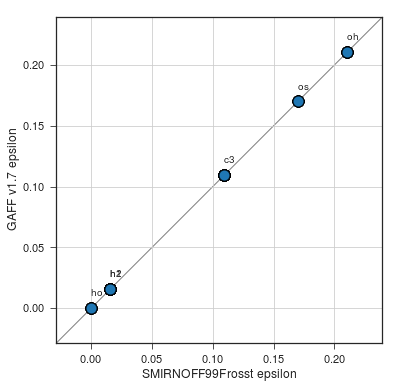

In [329]:
fig = plt.figure(figsize=(6, 6))
grid = GridSpec(1, 1)
ax = plt.subplot(grid[0, 0])

ax.scatter(
    lennard_jones["smirnoff_e"],
    lennard_jones["original_e"],
    s=120,
    alpha=0.8,
    edgecolor="k",
    lw=1,
)

for lj_type in np.unique(lennard_jones["original_type"].values):

    smirnoff_value = lennard_jones[lennard_jones["original_type"] == lj_type][
        "smirnoff_e"
    ].values[0]
    original_value = lennard_jones[lennard_jones["original_type"] == lj_type][
        "original_e"
    ].values[0]

    ax.annotate(f"{lj_type}", xy=(smirnoff_value, original_value + 0.01))

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, "k-", lw=1, alpha=0.5, zorder=0)
ax.set_aspect("equal")
ax.grid(zorder=-1)
ax.set_ylabel("GAFF v1.7 epsilon")
ax.set_xlabel("SMIRNOFF99Frosst epsilon")
ax.set_xlim(lims)
ax.set_ylim(lims)


(-0.1884558452182104, 3.5881253536689508)

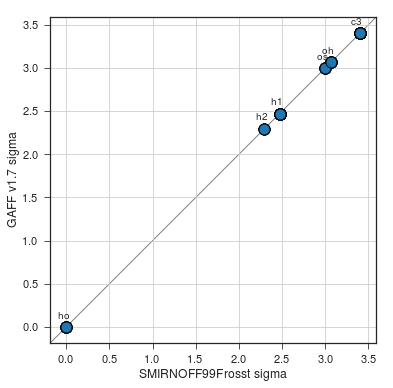

In [332]:
fig = plt.figure(figsize=(6, 6))
grid = GridSpec(1, 1)
ax = plt.subplot(grid[0, 0])

ax.scatter(
    lennard_jones["smirnoff_s"],
    lennard_jones["original_s"],
    s=120,
    alpha=0.8,
    edgecolor="k",
    lw=1,
)

for lj_type in np.unique(lennard_jones["original_type"].values):

    smirnoff_value = lennard_jones[lennard_jones["original_type"] == lj_type][
        "smirnoff_s"
    ].values[0]
    original_value = lennard_jones[lennard_jones["original_type"] == lj_type][
        "original_s"
    ].values[0]

    ax.annotate(f"{lj_type}", xy=(smirnoff_value - 0.1, original_value + 0.1))


lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, "k-", lw=1, alpha=0.5, zorder=0)
ax.set_aspect("equal")
ax.grid(zorder=-1)
ax.set_ylabel("GAFF v1.7 sigma")
ax.set_xlabel("SMIRNOFF99Frosst sigma")
ax.set_xlim(lims)
ax.set_ylim(lims)


# Bonds

In [372]:
bonds = pd.DataFrame()

for original_atom, smirnoff_atom in original_to_smirnoff_mapping.items():

    for original_bond, smirnoff_bond in zip(
        original[original_atom].bonds, smirnoff[smirnoff_atom].bonds
    ):
        atom1_name = original_bond.atom1.name
        atom2_name = original_bond.atom2.name

        original_req = original_bond.type.req
        original_k = original_bond.type.k

        smirnoff_req = smirnoff_bond.type.req
        smirnoff_k = smirnoff_bond.type.k

        bonds = bonds.append(
            pd.DataFrame(
                {
                    "atom1": atom1_name,
                    "atom2": atom2_name,
                    "original_req": original_req,
                    "smirnoff_req": smirnoff_req,
                    "original_k": original_k,
                    "smirnoff_k": smirnoff_k,
                },
                index=[0],
            ),
            ignore_index=True,
        )


In [373]:
bonds = bonds.drop_duplicates()

In [374]:
bonds

,atom1,atom2,original_req,smirnoff_req,original_k,smirnoff_k
0,C1,O1,1.439,1.370,301.5,320.0
1,C1,C2,1.535,1.526,303.1,310.0
2,C1,O5,1.439,1.370,301.5,320.0
3,C1,H1,1.100,1.090,326.4,340.0
5,O1,C4,1.439,1.370,301.5,320.0
7,C2,O2,1.426,1.526,314.1,310.0
8,C2,C3,1.535,1.410,303.1,320.0
10,C2,H2,1.093,1.090,335.9,340.0
12,C2,O2,1.426,1.410,314.1,320.0
13,O2,HO2,0.974,0.960,369.6,553.0


(0.9137043365216343, 1.5815223697956735)

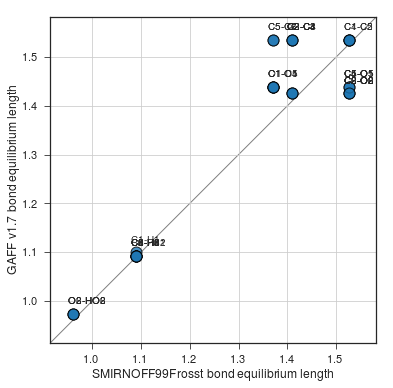

In [361]:
fig = plt.figure(figsize=(6, 6))
grid = GridSpec(1, 1)
ax = plt.subplot(grid[0, 0])

ax.scatter(
    bonds["smirnoff_req"],
    bonds["original_req"],
    s=120,
    alpha=0.8,
    edgecolor="k",
    lw=1,
)

for atom1, atom2 in zip(bonds["atom1"].values, bonds["atom2"].values):

    smirnoff_value = bonds[(bonds["atom1"] == atom1) & (bonds["atom2"] == atom2)][
        "smirnoff_req"
    ].values[0]
    original_value = bonds[(bonds["atom1"] == atom1) & (bonds["atom2"] == atom2)][
        "original_req"
    ].values[0]

    ax.annotate(f"{atom1}-{atom2}", xy=(smirnoff_value - 0.01, original_value + 0.02))


lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, "k-", lw=1, alpha=0.5, zorder=0)
ax.set_aspect("equal")
ax.grid(zorder=-1)
ax.set_ylabel("GAFF v1.7 bond equilibrium length")
ax.set_xlabel("SMIRNOFF99Frosst bond equilibrium length")
ax.set_xlim(lims)
ax.set_ylim(lims)


(297.83200433652155, 565.16799566347834)

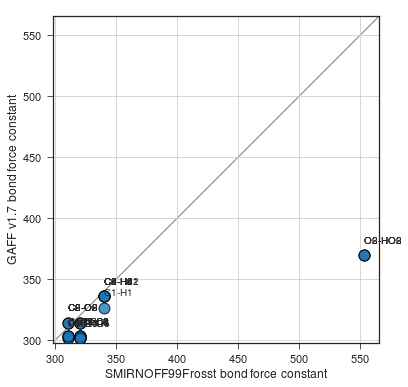

In [364]:
fig = plt.figure(figsize=(6, 6))
grid = GridSpec(1, 1)
ax = plt.subplot(grid[0, 0])

ax.scatter(
    bonds["smirnoff_k"],
    bonds["original_k"],
    s=120,
    alpha=0.8,
    edgecolor="k",
    lw=1,
)

for atom1, atom2 in zip(bonds["atom1"].values, bonds["atom2"].values):

    smirnoff_value = bonds[(bonds["atom1"] == atom1) & (bonds["atom2"] == atom2)][
        "smirnoff_k"
    ].values[0]
    original_value = bonds[(bonds["atom1"] == atom1) & (bonds["atom2"] == atom2)][
        "original_k"
    ].values[0]

    ax.annotate(f"{atom1}-{atom2}", xy=(smirnoff_value, original_value + 10))


lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, "k-", lw=1, alpha=0.5, zorder=0)
ax.set_aspect("equal")
ax.grid(zorder=-1)
ax.set_ylabel("GAFF v1.7 bond force constant")
ax.set_xlabel("SMIRNOFF99Frosst bond force constant")
ax.set_xlim(lims)
ax.set_ylim(lims)


# Dihedrals

In [391]:
dihedrals = pd.DataFrame()

for original_atom, smirnoff_atom in original_to_smirnoff_mapping.items():

    for original_dihedral, smirnoff_dihedral in zip(
        original[original_atom].dihedrals, smirnoff[smirnoff_atom].dihedrals
    ):
        
        # These are *NOT* sorted in the same order, so...
        # we need to come up with a better way.
        # `sort()` doesn't work.
        atom1_name = original_dihedral.atom1.name
        atom2_name = original_dihedral.atom2.name
        atom3_name = original_dihedral.atom3.name
        atom4_name = original_dihedral.atom4.name

        original_phi_k = original_dihedral.type.phi_k
        original_per = original_dihedral.type.per
        original_phase = original_dihedral.type.phase

        smirnoff_phi_k = smirnoff_dihedral.type.phi_k
        smirnoff_per = smirnoff_dihedral.type.per
        smirnoff_phase = smirnoff_dihedral.type.phase

        dihedrals = dihedrals.append(
            pd.DataFrame(
                {
                    "atom1": atom1_name,
                    "atom2": atom2_name,
                    "atom3": atom3_name,
                    "atom4": atom4_name,
                    "original_phi_k": original_phi_k,
                    "smirnoff_phi_k": smirnoff_phi_k,
                    "original_per": original_per,
                    "smirnoff_per": smirnoff_per,
                    "original_phase": original_phase,
                    "smirnoff_phase": smirnoff_phase,
                },
                index=[0],
            ),
            ignore_index=True,
        )


In [376]:
dihedrals = dihedrals.drop_duplicates()

In [377]:
dihedrals

,atom1,atom2,atom3,atom4,original_phi_k,smirnoff_phi_k,original_per,smirnoff_per,original_phase,smirnoff_phase
0,O5,C1,O1,C4,1.350000,0.144000,1,3,180.000077,0.0
1,O5,C1,O1,C4,0.850000,1.175000,2,2,180.000077,0.0
2,O5,C1,O1,C4,0.100000,0.156000,3,3,0.000000,0.0
3,O5,C1,C2,C3,0.155556,0.144000,3,3,0.000000,0.0
4,O5,C1,C2,O2,1.175000,1.175000,2,2,0.000000,0.0
5,O5,C1,C2,O2,0.144000,0.156000,3,3,0.000000,0.0
6,C2,C1,O1,C4,0.100000,0.156000,2,3,180.000077,0.0
7,C2,C1,O1,C4,0.383000,0.180000,3,3,0.000000,0.0
8,C2,C1,O5,C5,0.100000,0.250000,2,2,180.000077,180.0
9,C2,C1,O5,C5,0.383000,0.200000,3,1,0.000000,180.0


In [390]:
original[12].dihedrals

[<Dihedral; <Atom H4 [12]; In MGO 0>--<Atom C4 [11]; In MGO 0>--<Atom C5 [13]; In MGO 0>--<Atom H5 [14]; In MGO 0>; type=<DihedralType; phi_k=0.156, per=3, phase=0.000,  scee=1.200, scnb=2.000>>,
 <Dihedral; <Atom H4 [12]; In MGO 0>--<Atom C4 [11]; In MGO 0>--<Atom C5 [13]; In MGO 0>--<Atom O5 [15]; In MGO 0>; type=<DihedralType; phi_k=0.250, per=1, phase=0.000,  scee=1.200, scnb=2.000>>,
 <Dihedral [ign]; <Atom H4 [12]; In MGO 0>--<Atom C4 [11]; In MGO 0>--<Atom C5 [13]; In MGO 0>--<Atom O5 [15]; In MGO 0>; type=<DihedralType; phi_k=0.000, per=3, phase=0.000,  scee=1.200, scnb=2.000>>,
 <Dihedral; <Atom H4 [12]; In MGO 0>--<Atom C4 [11]; In MGO 0>--<Atom C5 [13]; In MGO 0>--<Atom C6 [16]; In MGO 0>; type=<DihedralType; phi_k=0.156, per=3, phase=0.000,  scee=1.200, scnb=2.000>>,
 <Dihedral; <Atom H4 [12]; In MGO 0>--<Atom C4 [11]; In MGO 0>--<Atom O1 [107]; In MGO 5>--<Atom C1 [105]; In MGO 5>; type=<DihedralType; phi_k=0.383, per=3, phase=0.000,  scee=1.200, scnb=2.000>>,
 <Dihedral; 

In [395]:
dir(smirnoff[12].dihedrals[0])

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_funct',
 'atom1',
 'atom2',
 'atom3',
 'atom4',
 'delete',
 'energy',
 'funct',
 'ignore_end',
 'improper',
 'measure',
 'same_atoms',
 'type']